This small notebook will be about methods of working with missing values in time series

We have data with missing values

In [36]:
!gdown --fuzzy https://drive.google.com/file/d/1JW_UIsA46NlATlZnEn-04n8o9BZ2w1FN/view?usp=sharing

Downloading...
From: https://drive.google.com/uc?id=1JW_UIsA46NlATlZnEn-04n8o9BZ2w1FN
To: /content/chem_data.csv
100% 15.4k/15.4k [00:00<00:00, 43.8MB/s]


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (23,9)

In [38]:
df = pd.read_csv('chem_data.csv', index_col=0)
df.head()

,value
2004-07-04,252.5
2004-07-11,252.5
2004-07-18,252.5
2004-07-25,251.0
2004-08-01,255.0


In [39]:
df.index = pd.to_datetime(df.index)
df.head()

,value
2004-07-04,252.5
2004-07-11,252.5
2004-07-18,252.5
2004-07-25,251.0
2004-08-01,255.0


Text(0.5, 1.0, 'Data')

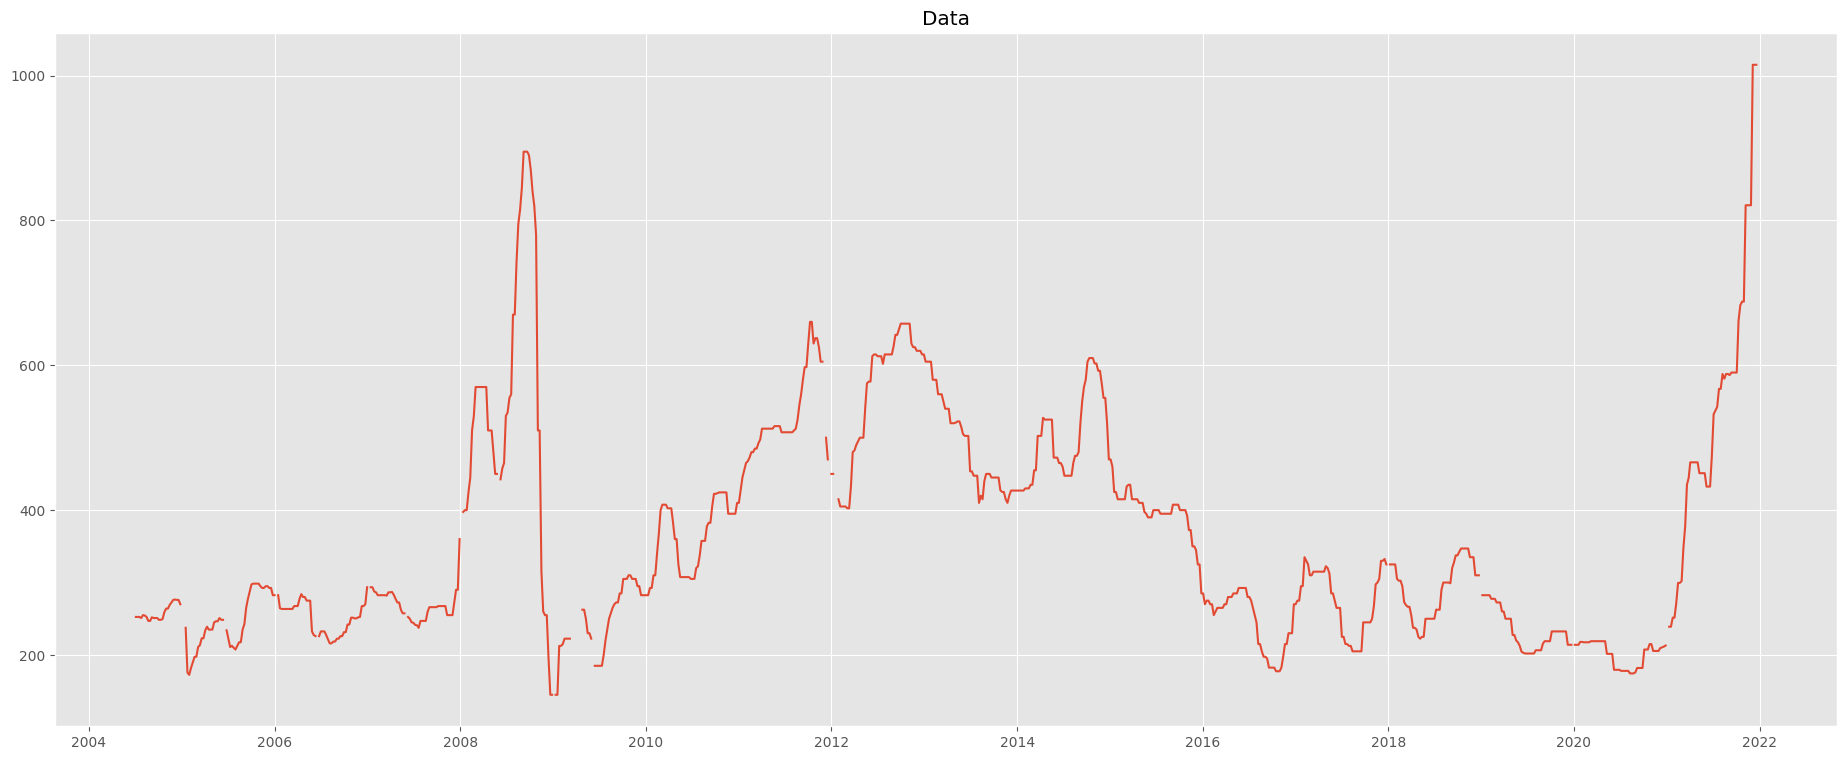

In [40]:
plt.plot(df)
plt.title("Data")

We can replace our missing values with last one

Text(0.5, 1.0, 'Replaced with last available values')

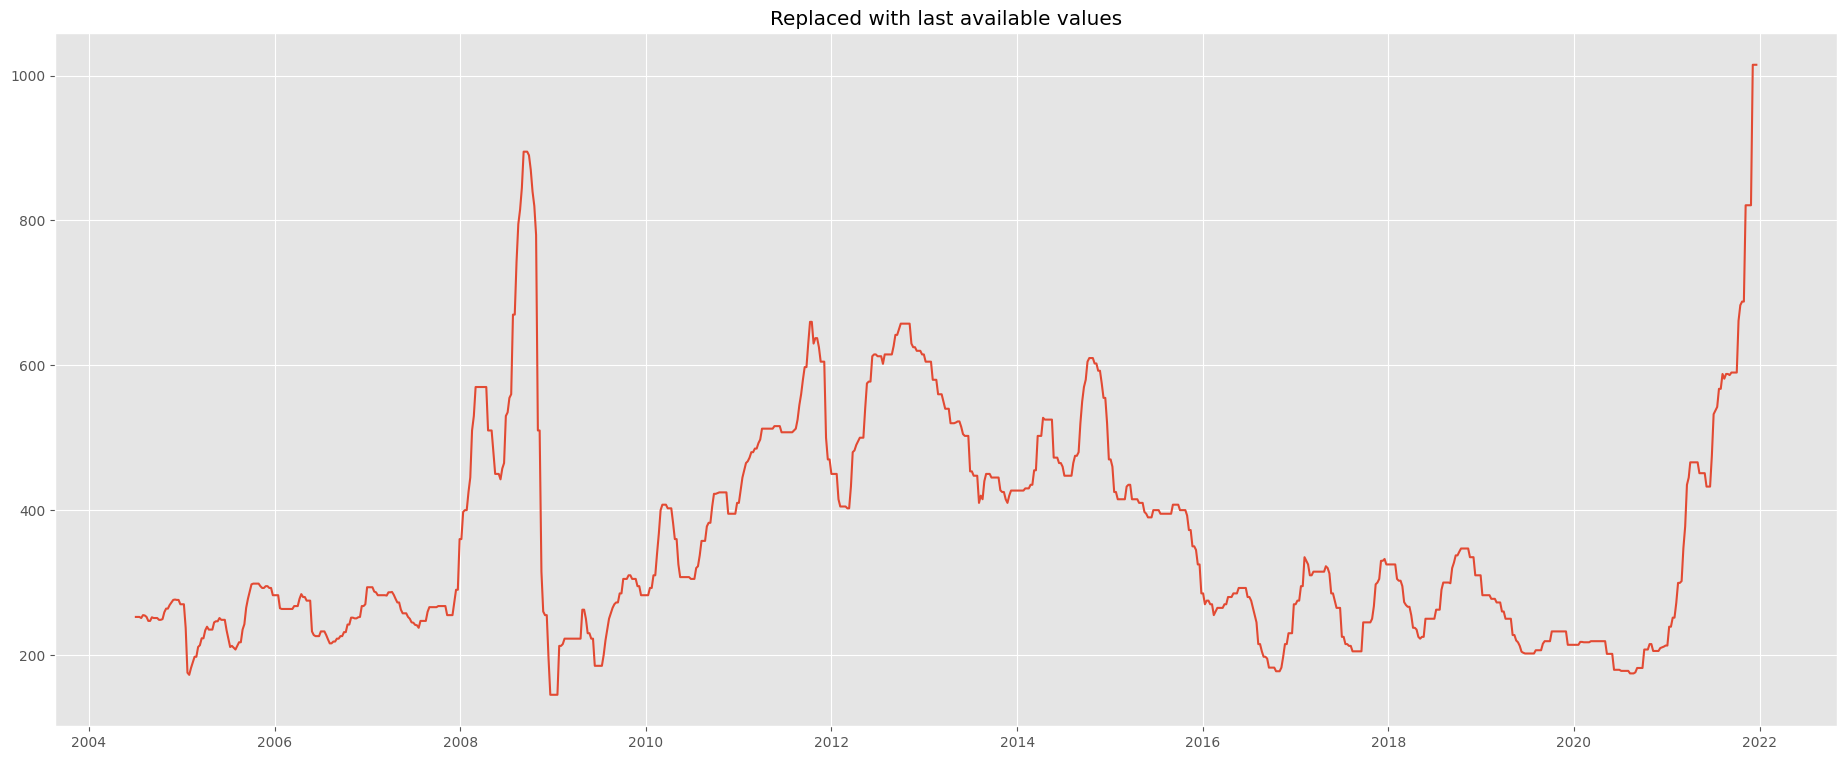

In [41]:
plt.plot(df.ffill())
plt.title("Replaced with last available values")



Or we can look at the structure of our data and try to interpolate it

In [42]:
import statsmodels.api as sm
data = sm.datasets.macrodata.load_pandas().data

<Axes: >

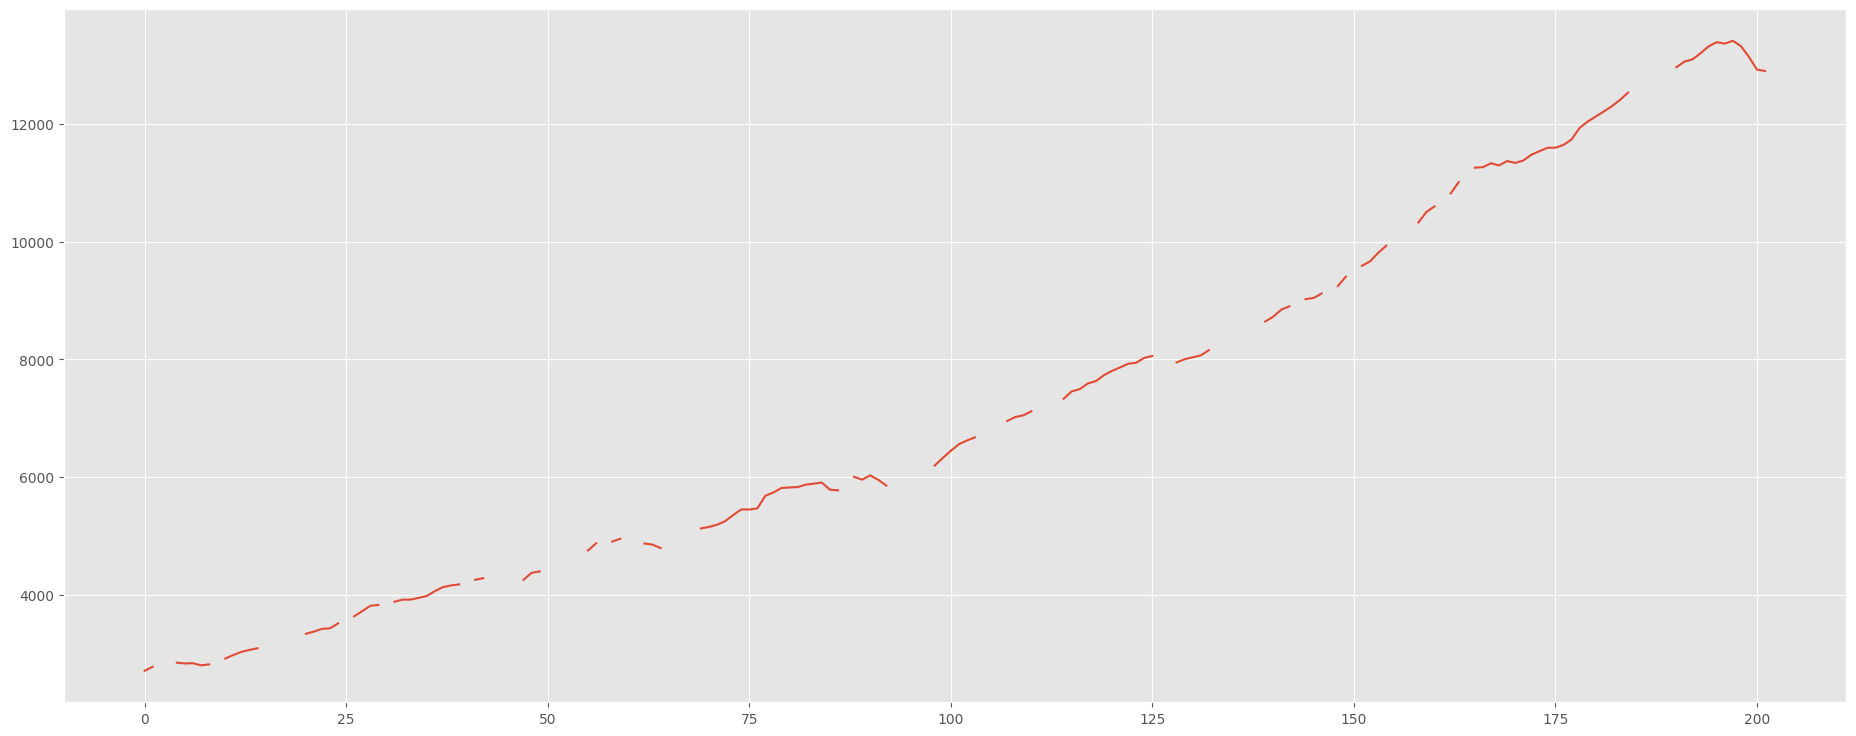

In [43]:
mask = np.random.binomial(1, 0.2, size=len(data)) > 0
gdp_true = data.realgdp.copy()
gdp_nan = gdp_true.copy()
gdp_nan[mask] = np.nan
gdp_nan.plot()

<Axes: >

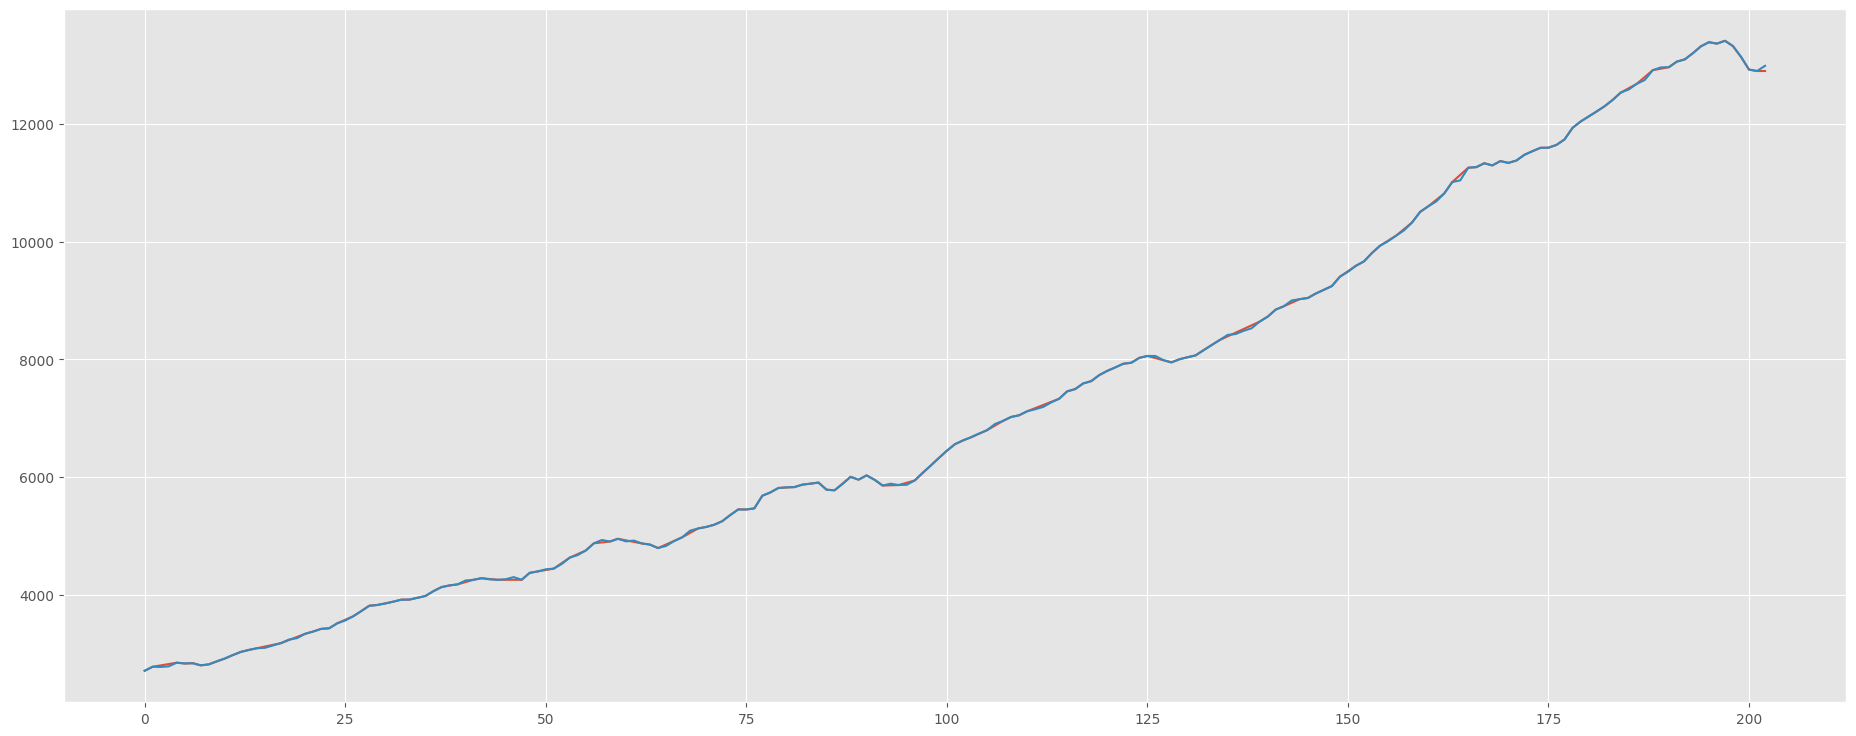

In [44]:
gdp_nan.interpolate(method='linear').plot()
gdp_true.plot()

We can also use LOWESS - locally weighted scatterplot smoothing to fill our missing data

In [45]:
gdp_true = data.realgdp.copy()
gdp_nan = gdp_true.copy()
gdp_nan[mask] = np.nan

gdp_nan = gdp_nan.reset_index(drop=True)

In [46]:
!pip install moepy

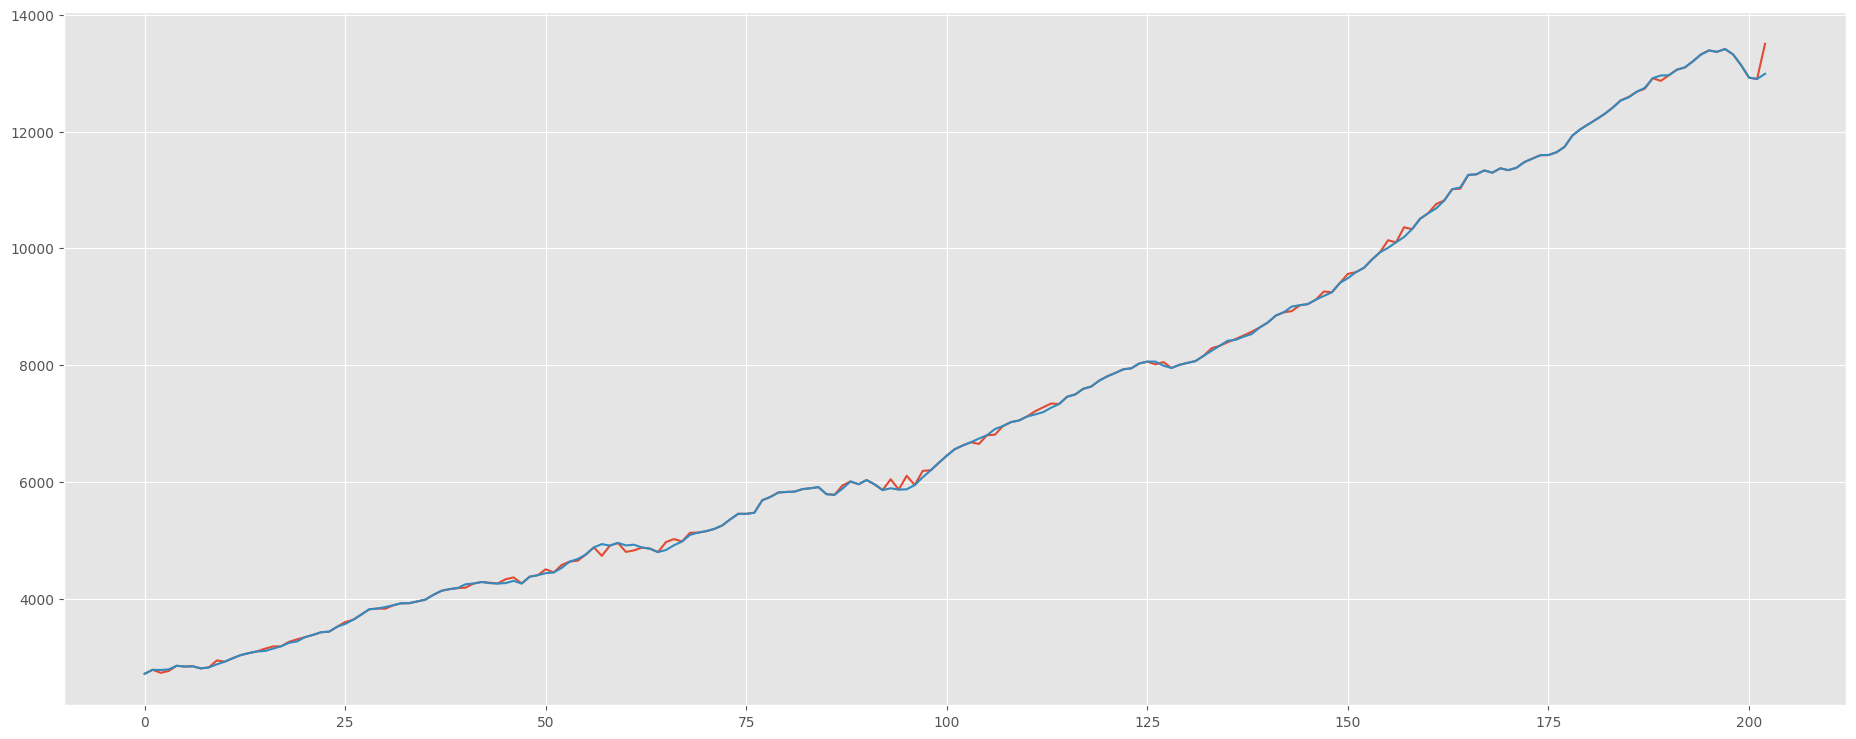

In [47]:
from moepy import lowess
#training data without missing values
x = np.array(gdp_nan[~mask].index)
y = gdp_nan[~mask].values
#test data
x_pred = np.array(gdp_nan[mask].index)
#fitting LOWESS
lowess_model = lowess.Lowess()
lowess_model.fit(x, y, frac=0.15)
y_pred = lowess_model.predict(x_pred)
gdp_filled = gdp_nan.copy()
#filling missing data with predicted values
gdp_filled[mask] = y_pred
gdp_filled.index = gdp_true.index
plt.plot(gdp_filled)
plt.plot(gdp_true)
plt.legend(frameon=False)

What to do with seasonal data?


<Axes: >

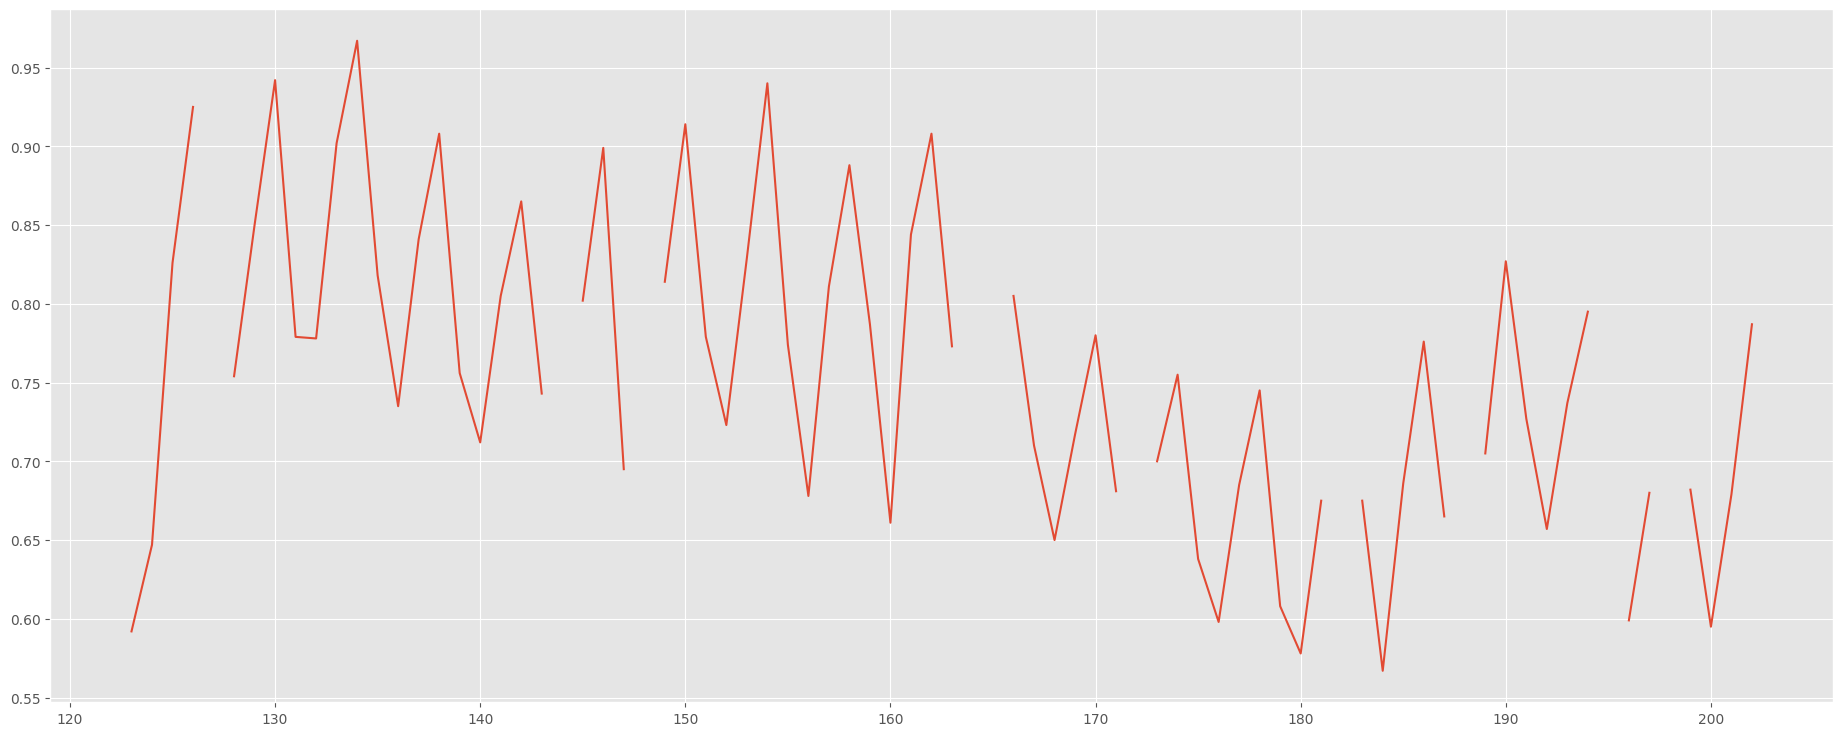

In [48]:
seasonal = data.loc[:,'pop'].diff().dropna().tail(80).copy()

mask = np.random.binomial(1, 0.1, size=len(seasonal)) > 0

seasonal_nan = seasonal.copy()
seasonal_nan[mask] = np.nan
seasonal_nan.plot()

We can use fill our data from with values from previous seasons

In [49]:
previous = seasonal.shift(4)
future = seasonal.shift(-4)
seasonal_nan[seasonal_nan.isna()] = ((previous + future) / 2)[seasonal_nan.isna()]

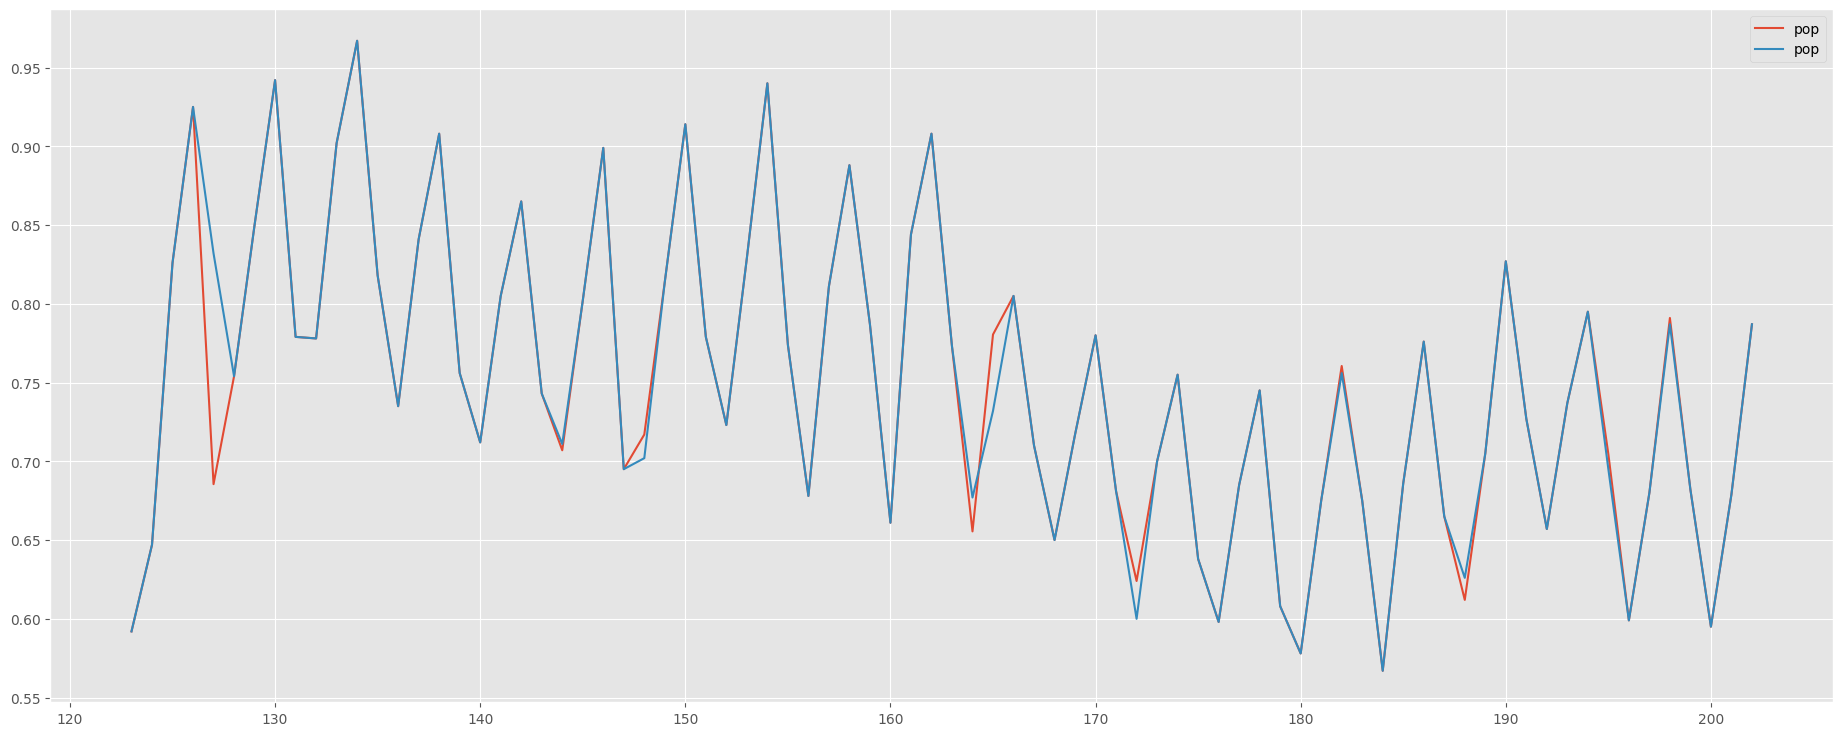

In [50]:
seasonal_nan.plot()
seasonal.plot()
plt.legend()